In [2]:
from pyspark.sql import SparkSession
from  pyspark.sql.functions import abs, round, avg, count, year
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# necessary imports

In [3]:
# Load spark session and read data into spark dataframe
spark = SparkSession.builder.master('local').getOrCreate()

# All the columns should be floats except for the 'Date' and 'Currency' columns.
schema = "Date date, Open float, High float, Low float, Close float, Volume float, Currency string"
df = spark.read.csv('data/coffee.csv', header=True, schema=schema)

# lower case all column names
df = df.toDF(*[c.lower() for c in df.columns])

df.show(5)

23/02/10 12:13:25 WARN Utils: Your hostname, Drews-MacBook-Pro.local resolves to a loopback address: 127.0.0.1; using 10.0.0.2 instead (on interface en0)
23/02/10 12:13:25 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address


Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).


23/02/10 12:13:25 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
+----------+------+------+------+------+------+--------+
|      date|  open|  high|   low| close|volume|currency|
+----------+------+------+------+------+------+--------+
|2000-01-03|122.25| 124.0| 116.1| 116.5|6640.0|     USD|
|2000-01-04|116.25| 120.5|115.75|116.25|5492.0|     USD|
|2000-01-05| 115.0| 121.0| 115.0| 118.6|6165.0|     USD|
|2000-01-06| 119.0| 121.4| 116.5|116.85|5094.0|     USD|
|2000-01-07|117.25|117.75| 113.8|114.15|6855.0|     USD|
+----------+------+------+------+------+------+--------+
only showing top 5 rows



In [4]:
# Add a column to the DataFrame where the values are the difference between 'Open' and 'Close'.
df = df.withColumn('daily_diff', round((df['close'] - df['open']), 2))

df.show(5)

+----------+------+------+------+------+------+--------+----------+
|      date|  open|  high|   low| close|volume|currency|daily_diff|
+----------+------+------+------+------+------+--------+----------+
|2000-01-03|122.25| 124.0| 116.1| 116.5|6640.0|     USD|     -5.75|
|2000-01-04|116.25| 120.5|115.75|116.25|5492.0|     USD|       0.0|
|2000-01-05| 115.0| 121.0| 115.0| 118.6|6165.0|     USD|       3.6|
|2000-01-06| 119.0| 121.4| 116.5|116.85|5094.0|     USD|     -2.15|
|2000-01-07|117.25|117.75| 113.8|114.15|6855.0|     USD|      -3.1|
+----------+------+------+------+------+------+--------+----------+
only showing top 5 rows



In [5]:
# Add a column to the DataFrame where the values are the difference between 'High' and 'Low'.
df = df.withColumn('high_low', round((df['high']-df['low']), 2))

df.show(5)

+----------+------+------+------+------+------+--------+----------+--------+
|      date|  open|  high|   low| close|volume|currency|daily_diff|high_low|
+----------+------+------+------+------+------+--------+----------+--------+
|2000-01-03|122.25| 124.0| 116.1| 116.5|6640.0|     USD|     -5.75|     7.9|
|2000-01-04|116.25| 120.5|115.75|116.25|5492.0|     USD|       0.0|    4.75|
|2000-01-05| 115.0| 121.0| 115.0| 118.6|6165.0|     USD|       3.6|     6.0|
|2000-01-06| 119.0| 121.4| 116.5|116.85|5094.0|     USD|     -2.15|     4.9|
|2000-01-07|117.25|117.75| 113.8|114.15|6855.0|     USD|      -3.1|    3.95|
+----------+------+------+------+------+------+--------+----------+--------+
only showing top 5 rows



In [6]:
# Add a column to the DataFrame where the values are 'True' if the volume for that day was 100 or above, and otherwise 'False'.
df = df.withColumn("volume_100", (df['volume'] >= 100))

df.show(5)

+----------+------+------+------+------+------+--------+----------+--------+----------+
|      date|  open|  high|   low| close|volume|currency|daily_diff|high_low|volume_100|
+----------+------+------+------+------+------+--------+----------+--------+----------+
|2000-01-03|122.25| 124.0| 116.1| 116.5|6640.0|     USD|     -5.75|     7.9|      true|
|2000-01-04|116.25| 120.5|115.75|116.25|5492.0|     USD|       0.0|    4.75|      true|
|2000-01-05| 115.0| 121.0| 115.0| 118.6|6165.0|     USD|       3.6|     6.0|      true|
|2000-01-06| 119.0| 121.4| 116.5|116.85|5094.0|     USD|     -2.15|     4.9|      true|
|2000-01-07|117.25|117.75| 113.8|114.15|6855.0|     USD|      -3.1|    3.95|      true|
+----------+------+------+------+------+------+--------+----------+--------+----------+
only showing top 5 rows



In [7]:
# Once you have a column for the difference between 'Open' and 'Close', add another column that contains the absolute values of the numbers in that column.
df = df.withColumn('abs_diff', round(abs(df.daily_diff), 2))

df.show(5)

+----------+------+------+------+------+------+--------+----------+--------+----------+--------+
|      date|  open|  high|   low| close|volume|currency|daily_diff|high_low|volume_100|abs_diff|
+----------+------+------+------+------+------+--------+----------+--------+----------+--------+
|2000-01-03|122.25| 124.0| 116.1| 116.5|6640.0|     USD|     -5.75|     7.9|      true|    5.75|
|2000-01-04|116.25| 120.5|115.75|116.25|5492.0|     USD|       0.0|    4.75|      true|     0.0|
|2000-01-05| 115.0| 121.0| 115.0| 118.6|6165.0|     USD|       3.6|     6.0|      true|     3.6|
|2000-01-06| 119.0| 121.4| 116.5|116.85|5094.0|     USD|     -2.15|     4.9|      true|    2.15|
|2000-01-07|117.25|117.75| 113.8|114.15|6855.0|     USD|      -3.1|    3.95|      true|     3.1|
+----------+------+------+------+------+------+--------+----------+--------+----------+--------+
only showing top 5 rows



In [8]:
# Compute a column called net_sales which is the average of opening, high, low, and closing cost times the volume: net_sales = avg(opening, high, low, closing price) * volume
df = df.withColumn("net_sales", ((df.open + df.high + df.low + df.close) / 4) * df.volume)

df.show(5)

+----------+------+------+------+------+------+--------+----------+--------+----------+--------+-----------------+
|      date|  open|  high|   low| close|volume|currency|daily_diff|high_low|volume_100|abs_diff|        net_sales|
+----------+------+------+------+------+------+--------+----------+--------+----------+--------+-----------------+
|2000-01-03|122.25| 124.0| 116.1| 116.5|6640.0|     USD|     -5.75|     7.9|      true|    5.75|794891.0101318359|
|2000-01-04|116.25| 120.5|115.75|116.25|5492.0|     USD|       0.0|    4.75|      true|     0.0|        643593.75|
|2000-01-05| 115.0| 121.0| 115.0| 118.6|6165.0|     USD|       3.6|     6.0|      true|     3.6|723771.0094070435|
|2000-01-06| 119.0| 121.4| 116.5|116.85|5094.0|     USD|     -2.15|     4.9|      true|    2.15|       603320.625|
|2000-01-07|117.25|117.75| 113.8|114.15|6855.0|     USD|      -3.1|    3.95|      true|     3.1|793380.5311203003|
+----------+------+------+------+------+------+--------+----------+--------+----

In [9]:
# Find the average of the values in the column that has the absolute values of the difference between 'Open' and 'Close'.
df.select(avg('abs_diff')).show(5)

+------------------+
|     avg(abs_diff)|
+------------------+
|1.7606027500686203|
+------------------+



In [10]:
# Get the count of values where the 'Volume' was less than 100.
df.select('volume_100').where(df.volume_100 == False).count()

1638

In [11]:
# Find the average 'Open' value.
# Get the highest 'High' value.

df.agg({'open': 'avg', 'high': 'max'}).show()

+---------+-----------------+
|max(high)|        avg(open)|
+---------+-----------------+
|   306.25|126.0496775257701|
+---------+-----------------+



In [13]:
# Save your DataFrame (including the four added columns) to /data as a parquet file. Exclude the /data directory from Git.
df.write.parquet('data/coffee_mod.parquet')


AnalysisException: path file:/Users/drewwhite/Desktop/Epicodus/data_week_13/data/coffee_mod.parquet already exists.

In [30]:
# Include code in the pipeline to write the Parquet file to BigQuery.

from google.cloud import bigquery
import logging
from logging import INFO
import pandas as pd
import sys

# Setting up logger configuration to log back information.
logging.basicConfig(format='[%(levelname)-5s][%(asctime)s][%(module)s:%(lineno)04d] : %(message)s',
                    level=INFO,
                    stream=sys.stderr)
logger: logging.Logger = logging

# Read parquet file into a pandas dataframe to be loaded to BigQuery
pd_coffee = pd.read_parquet("./data/coffee_mod.parquet/")

client = bigquery.Client()
logger.info("Configuring Google BigQuery API...")
dataset_id = f"{client.project}.coffee"
dataset = bigquery.Dataset(dataset_id)
dataset.location = "us-central1"
logger.info(f"Creating dataset in project {client.project}...")
dataset = client.create_dataset(dataset, exists_ok=True, timeout=30)
logger.info(f"Dataset: {dataset_id} created")

table_id = f"{dataset_id}.coffee"
table = bigquery.Table(table_id)

table.schema = [
    bigquery.SchemaField("date", "DATE"),
    bigquery.SchemaField("open", "FLOAT64"),
    bigquery.SchemaField("high", "FLOAT64"),
    bigquery.SchemaField("low", "FLOAT64"),
    bigquery.SchemaField("close", "FLOAT64"),
    bigquery.SchemaField("volume", "FLOAT64"),
    bigquery.SchemaField("currency", "STRING"),
    bigquery.SchemaField("daily_diff", "FLOAT64"),
    bigquery.SchemaField("high_low", "FLOAT64"),
    bigquery.SchemaField("volume_100", "BOOL"),
    bigquery.SchemaField("net_sales", "FLOAT64"),
]

table = client.create_table(table, exists_ok=True)

job_config = bigquery.LoadJobConfig()
job_config.autodetect = True
job_config.write_disposition = "WRITE_TRUNCATE"

logger.info(f"Creating table: {table_id} and loading dataframe...")
load_job = client.load_table_from_dataframe(pd_coffee, table_id, job_config=job_config)
load_job.result()

logger.info(f"Successfully loaded dataframe")

[INFO ][2023-02-10 11:58:13,843][604186963:0019] : Configuring Google BigQuery API...
[INFO ][2023-02-10 11:58:13,844][604186963:0023] : Creating dataset in project deb-dev-dw...
[INFO ][2023-02-10 11:58:14,576][604186963:0025] : Dataset: deb-dev-dw.coffee created
[INFO ][2023-02-10 11:58:14,885][604186963:0050] : Creating table: deb-dev-dw.coffee.coffee and loading dataframe...
[INFO ][2023-02-10 11:58:19,911][604186963:0054] : Successfully loaded dataframe


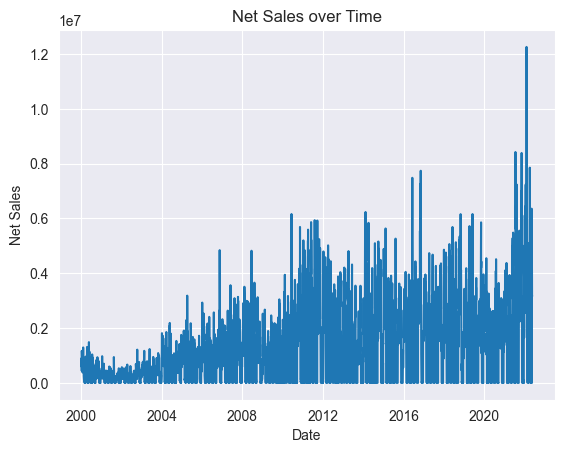

In [14]:
# Use Matplotlib to create a visualization (i.e. a chart) using the coffee data.
# Convert Spark dataframe to pandas dataframe
pdf = df.toPandas()

# Plot the data using matplotlib
sns.set_style("darkgrid")
plt.plot(pdf["date"], pdf["net_sales"])
plt.xlabel("Date")
plt.ylabel("Net Sales")
plt.title("Net Sales over Time")
plt.show()